TASK 1 [10]


In [77]:
# import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

from initialKNN import KNNClassifier
from optimalKNN import OptimalKNNClassifier

# load the data that contained pickled objects (.npy) from given file
data = np.load('data.npy', allow_pickle=True)

# given 4th row in data has labels, return them and count of each unique value
labels, counts = np.unique(data[:, 3], return_counts=True)

# lists to store time_taken for plotting graphs
inference_time = []
datasize_vs_time_optimal = []
datasize_vs_time_default = []
datasize_vs_time_initial = []


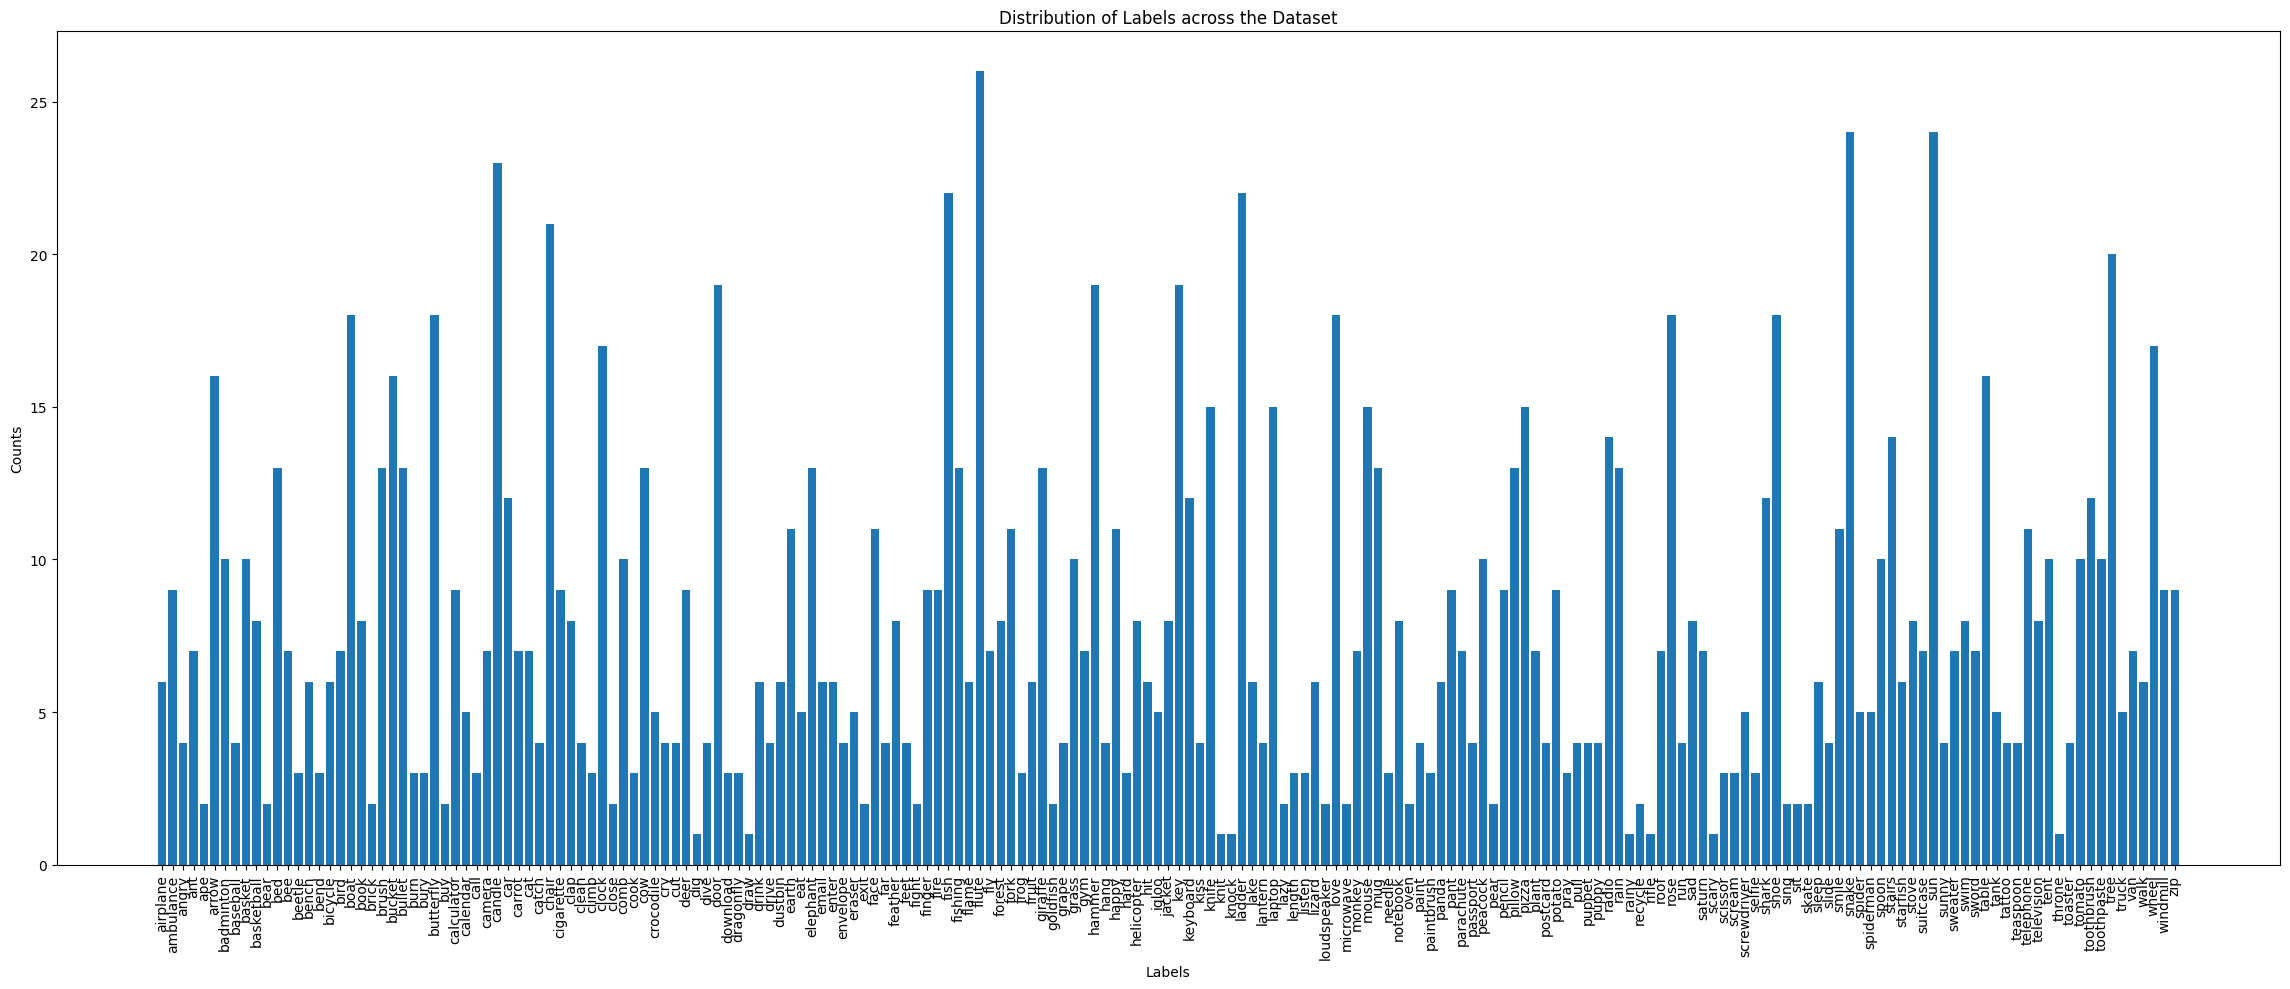

In [78]:
# plot the distribution of labels across the dataset
plt.figure(figsize=(23, 10))
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels across the Dataset')
plt.xticks(rotation=90)
plt.tight_layout()

# show the plot
plt.show()


Task 1 [30]


In [79]:
# import sklearn metrics to evaluate different scores
from collections import Counter
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split


In [80]:
X = data
y = data[:, 3]  # labels

# if encoder = 1, then 'ResNet'; else if encoder = 2, then 'VIT'
knn = OptimalKNNClassifier(encoder=2, k=12, distance_metric='manhattan')
results = knn.split_and_evaluate(X, y)
# print(inference_time)
# print(results[1])
evaluation_results = results[0]
inference_time.extend(results[1])
# print(inference_time)
# print(results[2])


In [81]:
X = data
y = data[:, 3]  # labels

# if encoder = 1, then 'ResNet'; else if encoder = 2, then 'VIT'
knn = KNNClassifier(encoder=2, k=12, distance_metric='manhattan')
results = knn.split_and_evaluate(X, y)
evaluation_results = results[0]
inference_time.extend(results[1])


In [82]:
from sklearn.neighbors import KNeighborsClassifier

# default knn classifier

X_def = data[:, 2]
X_def = [x[0] for x in X_def]
y_def = data[:, 3]
knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan')
X_train_default, X_val_default, y_train_def, y_val_def = train_test_split(
    X_def, y_def, test_size=0.2, random_state=42)

knn.fit(X_train_default, y_train_def)

start_time = time.time()
y_pred_default = knn.predict(X_val_default)
end_time = time.time()

if len(inference_time) == 2:
    inference_time.append(end_time-start_time)
elif len(datasize_vs_time_default) < 10:
    datasize_vs_time_default.append(end_time-start_time)
else:
    datasize_vs_time_default.clear()
    datasize_vs_time_default.append(end_time-start_time)

f1 = f1_score(y_val_def, y_pred_default, average='weighted')
accuracy = accuracy_score(y_val_def, y_pred_default)
precision = precision_score(
    y_val_def, y_pred_default, average='weighted', zero_division=1)
recall = recall_score(y_val_def, y_pred_default,
                      average='weighted', zero_division=1)

# print(f'Accuracy_default: {accuracy}')
# print(f'Precision_default: {precision}')
# print(f'F1: {f1}')
# print(f'Recall: {recall}')


In [83]:
# varying data size and getting time taken by knn default classifier
for i in range(100, 1001, 100):
    data_var_t = data[:i]
    X_var = data_var_t[:, 2]
    X_var = [x[0] for x in X_var]
    y_var = data_var_t[:, 3]
    knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan')
    X_train_default, X_val_default, y_train_def, y_val_def = train_test_split(
        X_var, y_var, test_size=0.2, random_state=42)

    knn.fit(X_train_default, y_train_def)

    start_time = time.time()
    y_pred_default = knn.predict(X_val_default)
    end_time = time.time()

    if len(inference_time) == 2:
        inference_time.append(end_time-start_time)
    elif len(datasize_vs_time_default) < 10:
        datasize_vs_time_default.append(end_time-start_time)
    else:
        datasize_vs_time_default.clear()
        datasize_vs_time_default.append(end_time-start_time)

    f1 = f1_score(y_val_def, y_pred_default, average='weighted')
    accuracy = accuracy_score(y_val_def, y_pred_default)
    precision = precision_score(
        y_val_def, y_pred_default, average='weighted', zero_division=1)
    recall = recall_score(y_val_def, y_pred_default,
                          average='weighted', zero_division=1)


In [84]:
# print evaluation results
print("Evaluation Results:")
print("F1 Score:", evaluation_results['f1_score'])
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])


Evaluation Results:
F1 Score: 0.2686039212043049
Accuracy: 0.2966666666666667
Precision: 0.5353917961123843
Recall: 0.34957225314368173


In [85]:

# varying data size and getting time taken by knn optimal classifier & initial classifier
datasize_vs_time_initial = []
datasize_vs_time_optimal = []
for i in range(100, 1001, 100):
    data_var = data[:i]
    X_var = data_var
    y_var = data_var[:, 3]
    knn1 = OptimalKNNClassifier(encoder=2, k=12, distance_metric='manhattan',
                                datasize_vs_time_optimal=[], consider_times=1)
    results = knn1.split_and_evaluate(X_var, y_var)
    datasize_vs_time_optimal.extend(results[2])
    knn2 = KNNClassifier(encoder=2, k=12, distance_metric='manhattan',
                         datasize_vs_time_initial=[], consider_times=1)
    results = knn2.split_and_evaluate(X_var, y_var)
    datasize_vs_time_initial.extend(results[2])


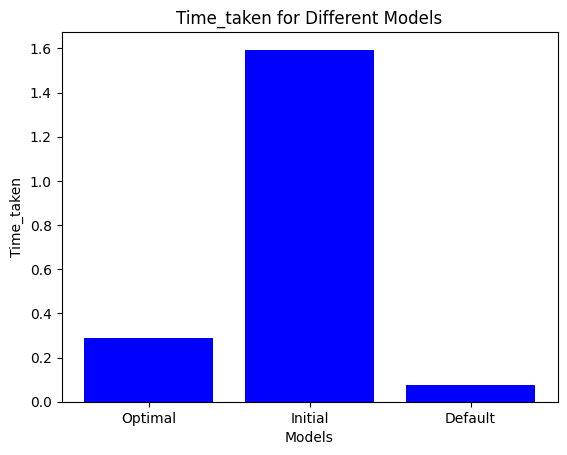

In [86]:
# labels for the x-axis
labels = ['Optimal', 'Initial', 'Default']

# print(len(inference_time))

# create a bar plot
plt.bar(labels, inference_time, color='blue')

# adding labels and title
plt.xlabel('Models')
plt.ylabel('Time_taken')
plt.title('Time_taken for Different Models')

# display the plot
plt.show()


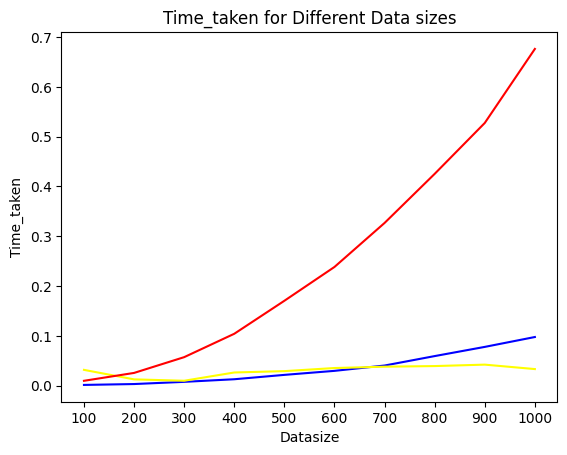

In [87]:
# labels for the x-axis
labels = ['100', '200', '300', '400', '500',
          '600', '700', '800', '900', '1000']

# print(len(inference_time))

# create a bar plot
plt.plot(labels, datasize_vs_time_optimal, color='blue', label='optimal')
plt.plot(labels, datasize_vs_time_default, color='yellow', label='default')
plt.plot(labels, datasize_vs_time_initial, color='red', label='initial')

# adding labels and title
plt.xlabel('Datasize')
plt.ylabel('Time_taken')
plt.title('Time_taken for Different Data sizes')

# display the plot
plt.show()


Task 2 [30]


In [88]:
# import itertools module for iteration purpose in searching triplets
import itertools


Best Triplet: (12, 'VIT', 'manhattan', 0.2966666666666667)


Top 20 Triplets (k, encoder, distance metric, accuracy):
Rank 1: (12, 'VIT', 'manhattan', 0.2966666666666667)
Rank 2: (4, 'VIT', 'manhattan', 0.29)
Rank 3: (3, 'VIT', 'manhattan', 0.28)
Rank 4: (15, 'VIT', 'manhattan', 0.2733333333333333)
Rank 5: (3, 'VIT', 'euclidean', 0.27)
Rank 6: (4, 'VIT', 'euclidean', 0.26666666666666666)
Rank 7: (20, 'VIT', 'manhattan', 0.26666666666666666)
Rank 8: (12, 'VIT', 'euclidean', 0.26)
Rank 9: (3, 'VIT', 'cosine', 0.25333333333333335)
Rank 10: (4, 'VIT', 'cosine', 0.25333333333333335)
Rank 11: (15, 'VIT', 'cosine', 0.25)
Rank 12: (12, 'VIT', 'cosine', 0.24666666666666667)
Rank 13: (15, 'VIT', 'euclidean', 0.24666666666666667)
Rank 14: (20, 'VIT', 'euclidean', 0.24666666666666667)
Rank 15: (20, 'VIT', 'cosine', 0.24666666666666667)
Rank 16: (15, 'ResNet', 'manhattan', 0.23666666666666666)
Rank 17: (12, 'ResNet', 'manhattan', 0.22666666666666666)
Rank 18: (20, 'ResNet', 'manhattan', 0.22)
Rank 

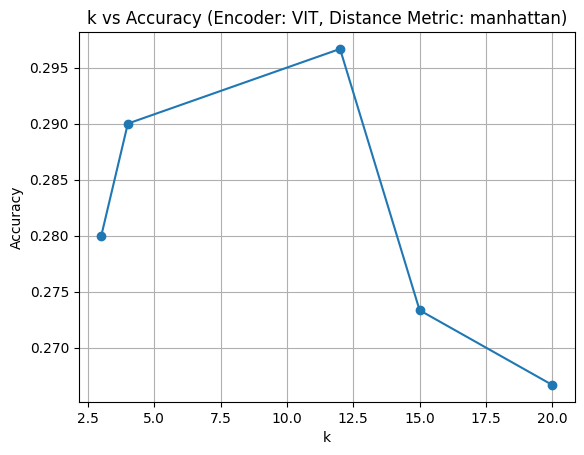

In [89]:
class HyperparameterSearch:
    def __init__(self, X, y, distance_metric='euclidean'):
        self.X = X
        self.y = y
        self.distance_metric = distance_metric

    # method that performs a search for the best hyperparameter triplet for the KNN classifier
    def search_best_triplet(self):
        best_triplets = []
        for k, encoder, dist_metric in itertools.product([3, 4, 12, 15, 20], ['ResNet', 'VIT'], ['euclidean', 'manhattan', 'cosine']):
            encoder_type = 1
            if (encoder == 'VIT'):
                encoder_type = 2
            knn = OptimalKNNClassifier(
                encoder=encoder_type, k=k, distance_metric=dist_metric)
            results = knn.split_and_evaluate(self.X, self.y)
            eval_results = results[0]
            accuracy = eval_results['accuracy']
            best_triplets.append((k, encoder, dist_metric, accuracy))

        # sort based on accuracy
        best_triplets.sort(key=lambda x: x[3], reverse=True)
        return best_triplets
    # method that creates a plot of the relationship between the k hyperparameter and accuracy for a specific encoder and distance metric

    def plot_k_vs_accuracy(self, k, encoder, dist_metric):
        accuracies = []
        for k_value in k:
            encoder_type = 1
            if (encoder == 'VIT'):
                encoder_type = 2
            knn = OptimalKNNClassifier(
                encoder=encoder_type, k=k_value, distance_metric=dist_metric)
            results = knn.split_and_evaluate(self.X, self.y)
            eval_results = results[0]
            accuracy = eval_results['accuracy']
            accuracies.append(accuracy)

        plt.plot(k, accuracies, marker='o')
        plt.xlabel('k')
        plt.ylabel('Accuracy')
        plt.title(
            f'k vs Accuracy (Encoder: {encoder}, Distance Metric: {dist_metric})')
        plt.grid(True)
        plt.show()


# create an instance for HyperparameterSearch class
hyperparameter_search = HyperparameterSearch(X, y, distance_metric='euclidean')

# get all triplets (k, encoder, distance_metric) sorted based on accuracy
best_triplets = hyperparameter_search.search_best_triplet()

# top most best triplet (i.e. with maximum accuracy)
best_triplet = max(best_triplets, key=lambda x: x[3])
print("Best Triplet:", best_triplet)
print("")
print("")
# print top 20 triplets with maximum accuracy
print("Top 20 Triplets (k, encoder, distance metric, accuracy):")
for rank, triplet in enumerate(best_triplets[:20], start=1):
    print(f"Rank {rank}: {triplet}")

print("")
print("")
# chose parameters
chosen_distance_metric = 'manhattan'
chosen_encoder = 'VIT'
k_values = [3, 4, 12, 15, 20]

# plot k_vs_accuracy for chosen parameters
hyperparameter_search.plot_k_vs_accuracy(
    k_values, chosen_encoder, chosen_distance_metric)


Decision Tree Tasks


In [90]:
# import all necessary modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
from sklearn.model_selection import train_test_split


In [91]:
# get data from given csv data file using pandas
data_dt = pd.read_csv('advertisement.csv')

# define the categorical columns
categorical_columns = ['gender', 'education',
                       'married', 'city', 'occupation', 'most bought item']

# perform one-hot encoding using pd.get_dummies
encoded_df = pd.get_dummies(
    data_dt[categorical_columns], columns=categorical_columns)

# concatenate the encoded features with the original numerical features
X = pd.concat([data_dt.drop(columns=categorical_columns), encoded_df], axis=1)

# X is all columns except labels after onehot encoding
X = X.drop(columns=['labels'])

# y is labels column
y = data_dt['labels']


In [92]:
# store all labels in a single list
y_labels = [labels.split() for labels in y]
all_labels = []
for row in y_labels:
    for r in row:
        all_labels.append(r)

labels, counts = np.unique(all_labels, return_counts=True)


# counts to plot for data visualization

# powerset formation method
def powerset_iterative(lst):
    powerset = [[]]
    for elem in lst:
        new_subsets = []
        for prev in powerset:
            new_subsets.append(prev + [elem])
        powerset.extend(new_subsets)
    return powerset


# store all powerset of labels in a list
powerset_list = powerset_iterative(labels)


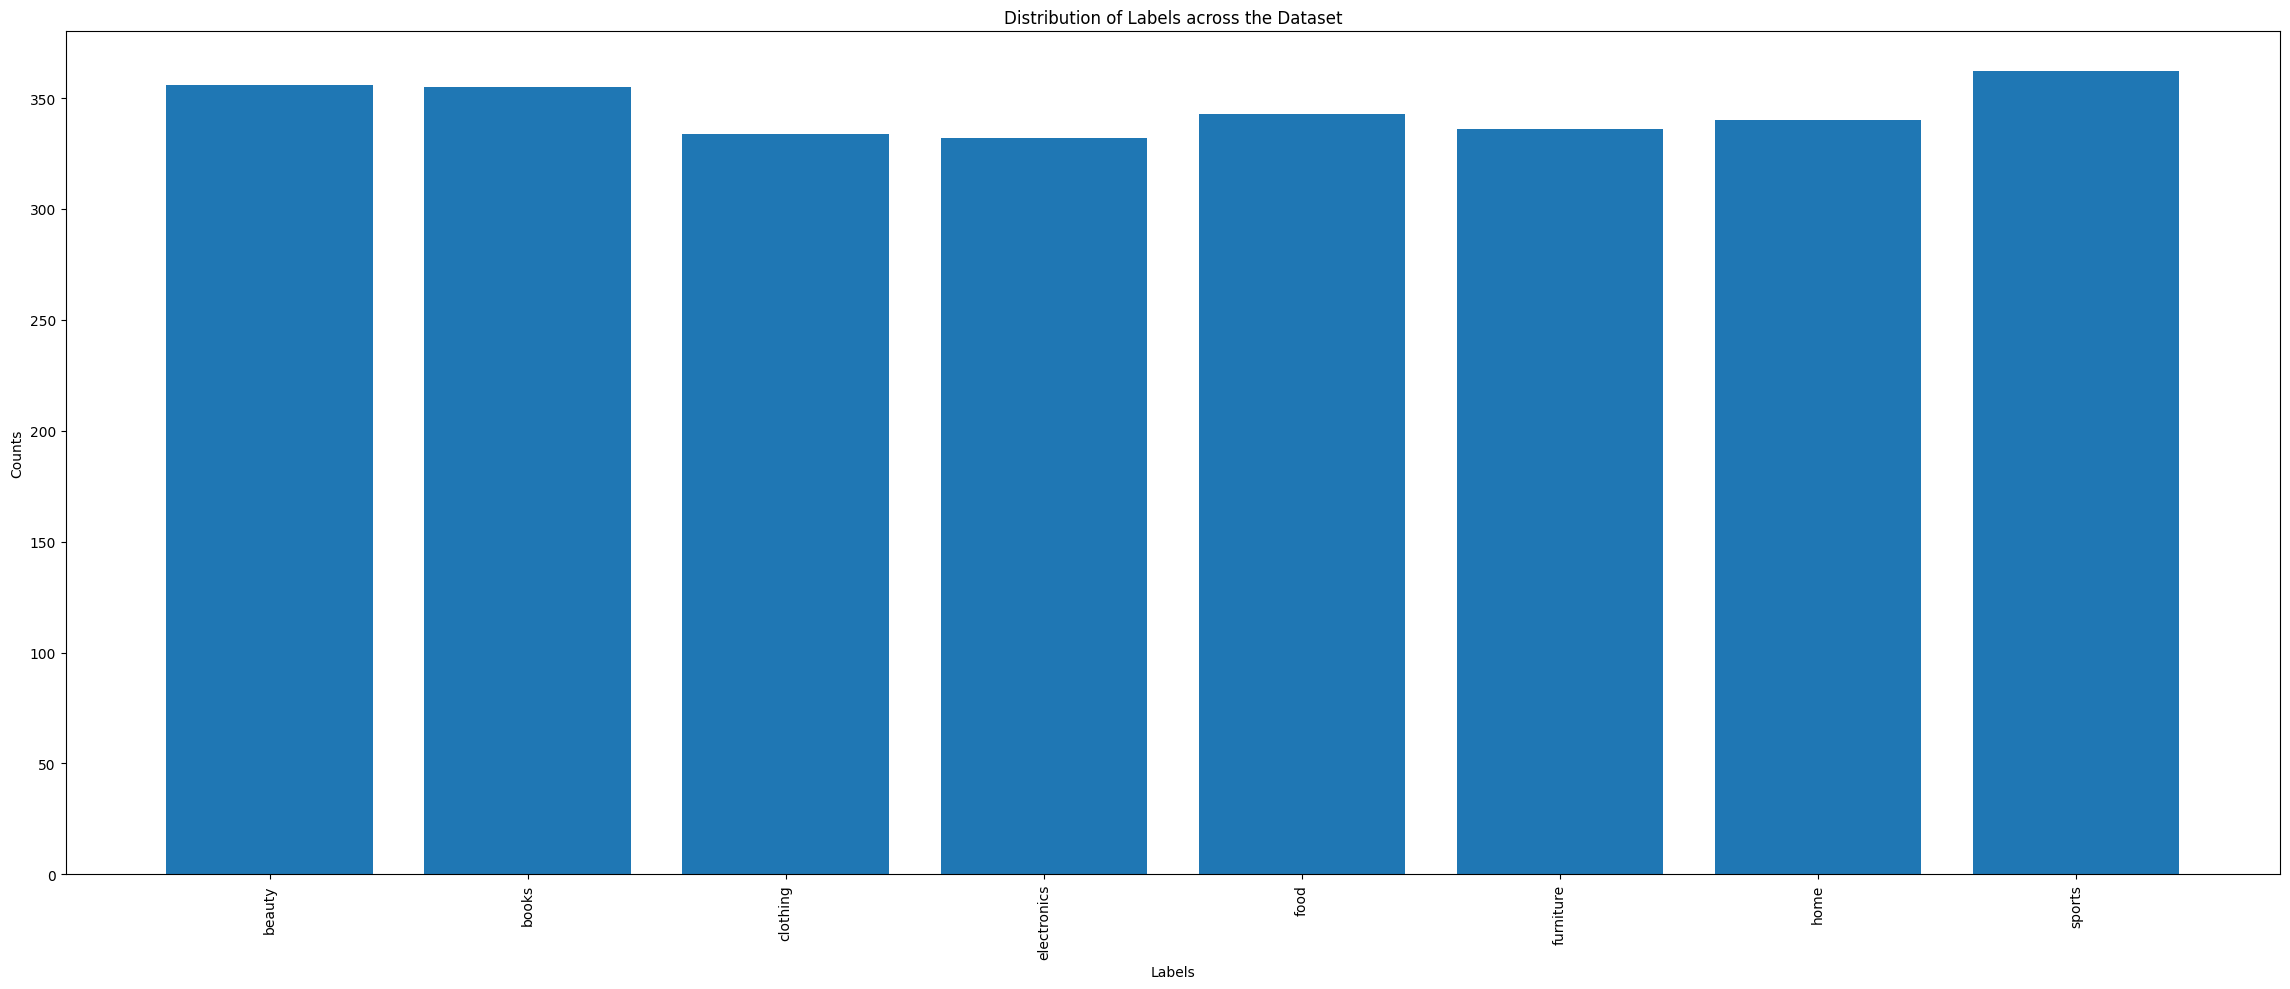

In [93]:
# as part of data visualization
# plot the distribution of labels across the dataset
plt.figure(figsize=(23, 10))
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Distribution of Labels across the Dataset')
plt.xticks(rotation=90)
plt.tight_layout()

# show the plot
plt.show()


In [94]:
feature_array = np.zeros((1000, 256))

# one hot encoding (to assign 1 in feature_array if set in powerset matches with that particular member label set)
for member_idx, member_label in enumerate(y_labels):
    for label_idx, label_set in enumerate(powerset_list):
        if (set(label_set) == set(member_label)):
            feature_array[member_idx, label_idx] = 1

# print(feature_array)


In [95]:
y = feature_array

# split the data into train and val subsets after one-hot encoding
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [96]:
# create DecisionTreePowerset class using inbuilt DecisionTreeClassifier
# parameters are max_depth, max_features, criterion
class DecisionTreePowerset:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        # max_depth: The maximum depth of the decision tree.
        # max_features: The number of features to consider when looking for the best split.
        # criterion: The function to measure the quality of a split.
        # criterion -> 'gini' for Gini Impurity & 'entropy' for Information Gain
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = DecisionTreeClassifier(
            max_depth=max_depth,
            max_features=max_features,
            criterion=criterion
        )

    # fit method allows you to fit the decision tree classifier to the training data X and corresponding labels y
    def fit(self, X, y):
        self.classifier.fit(X, y)

    # returns the predicted labels using the trained decision tree classifier
    def predict(self, X):
        return self.classifier.predict(X)


In [97]:
# initialize the Powerset Decision Tree model
powerset_model = DecisionTreePowerset(
    max_depth=30, max_features=11, criterion='gini')

# fit the model to your training data
powerset_model.fit(X_train, y_train)

# predict using the fitted model
powerset_predictions = powerset_model.predict(X_val)
#y_val_list = y_val.tolist()

#labels1, counts1 = np.unique(y_val_list, return_counts=True)
#print(labels1, counts1)

#powerset_list = powerset_predictions.tolist();

#labels, counts = np.unique(powerset_list, return_counts=True)
#print(labels, counts)

# get the accuracy score based on powerset_predictions
accuracy_powerset = accuracy_score(y_val, powerset_predictions)
print("Accuracy powerset: ", accuracy_powerset)


Accuracy powerset:  0.01


In [98]:
# using default multilabelbinarizer from sklearn to create 1000x8 binary_matrix
mlb = MultiLabelBinarizer()
binary_matrix = mlb.fit_transform(y_labels)
# print(binary_matrix)

# split the binary matrix, X_trai and X_val are same as before
binarized_y_train, binarized_y_val = train_test_split(
    binary_matrix, test_size=0.2, random_state=42)


In [99]:
# import MultiOutputClassifier from sklearn
from sklearn.multioutput import MultiOutputClassifier


In [100]:
# create DecisionTreeMultiOutput class using inbuilt MultiOutputClassifier
# parameters are max_depth, max_features, criterion
class DecisionTreeMultiOutput:
    def __init__(self, max_depth=None, max_features=None, criterion='gini'):
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.classifier = MultiOutputClassifier(
            DecisionTreeClassifier(
                max_depth=max_depth,
                max_features=max_features,
                criterion=criterion
            )
        )

    # fit method allows you to fit the multi output classifier to the training data X and corresponding labels y
    def fit(self, X, y):
        self.classifier.fit(X, y)

    # returns the predicted labels using the trained multi output classifier
    def predict(self, X):
        return self.classifier.predict(X)


In [101]:
# initialize the MultiOutput Decision Tree model
multioutput_model = DecisionTreeMultiOutput(
    max_depth=5, max_features=5, criterion='gini')

# fit the model to your training data
multioutput_model.fit(X_train, binarized_y_train)

# predict using the fitted model
multioutput_predictions = multioutput_model.predict(X_val)

# get the accuracy of multioutput model for above given parameters
accuracy_multioutput = accuracy_score(binarized_y_val, multioutput_predictions)
print("Accuracy multioutput: ", accuracy_multioutput)


Accuracy multioutput:  0.005


In [102]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score
from itertools import product

# define hyperparameter values
criteria = ['gini', 'entropy']
max_depths = [3, 5, 10, 20, 30]
max_features = [3, 5, 7, 9, 11]

# list to store results
results = []

# iterate through all possible combinations of hyperparameters
for criterion, max_depth, max_feature in product(criteria, max_depths, max_features):
    # build the powerset model
    powerset_model = DecisionTreePowerset(
        max_depth=max_depth, max_features=max_feature, criterion=criterion)
    powerset_model.fit(X_train, y_train)
    powerset_predictions = powerset_model.predict(X_val)

    # calculate metrics for powerset
    accuracy_powerset = accuracy_score(y_val, powerset_predictions)
    f1_micro_powerset = f1_score(
        y_val, powerset_predictions, average='micro', zero_division=0)
    f1_macro_powerset = f1_score(
        y_val, powerset_predictions, average='macro', zero_division=0)
    confusion_matrix_powerset = confusion_matrix(
        y_val.argmax(axis=1), powerset_predictions.argmax(axis=1))
    precision_powerset = precision_score(y_val.argmax(
        axis=1), powerset_predictions.argmax(axis=1), average='weighted', zero_division=0)
    recall_powerset = recall_score(
        y_val, powerset_predictions, average='macro', zero_division=0)

    # build the multioutput model
    multioutput_model = DecisionTreeMultiOutput(
        max_depth=max_depth, max_features=max_feature, criterion=criterion)
    multioutput_model.fit(X_train, binarized_y_train)
    multioutput_predictions = multioutput_model.predict(X_val)

    # calculate metrics for multioutput
    accuracy_multioutput = accuracy_score(
        binarized_y_val, multioutput_predictions)
    f1_micro_multioutput = f1_score(
        binarized_y_val, multioutput_predictions, average='micro', zero_division=0)
    f1_macro_multioutput = f1_score(
        binarized_y_val, multioutput_predictions, average='macro', zero_division=0)
    confusion_matrix_multioutput = confusion_matrix(
        binarized_y_val.argmax(axis=1), multioutput_predictions.argmax(axis=1))
    # confusion_matrix_multioutput = [[0 for i in range(8)] for i in range(8)]
    # for i in range(len(binarized_y_val)):
    #     for j in range(8):
    #         for k in range(8):
    #             if binarized_y_val[i][j] and multioutput_predictions[i][k]:
    #                 confusion_matrix_multioutput[j][k] += 1

    precision_multioutput = precision_score(
        binarized_y_val, multioutput_predictions, average='macro', zero_division=0)
    recall_multioutput = recall_score(
        binarized_y_val, multioutput_predictions, average='macro', zero_division=0)

    # append results to the list
    results.append((criterion, max_depth, max_feature,
                    accuracy_powerset, f1_micro_powerset, f1_macro_powerset, confusion_matrix_powerset,
                    precision_powerset, recall_powerset,
                    accuracy_multioutput, f1_micro_multioutput, f1_macro_multioutput, confusion_matrix_multioutput,
                    precision_multioutput, recall_multioutput))

# displaying results in decreasing order of powerset accuracy as so many of them are showing 0 otherwise
results.sort(key=lambda x: x[3], reverse=True)

# print the results
for result in results:
    print("")
    print("Criteria: ", result[0])
    print("Max Depth: ", result[1])
    print("Max Feature: ", result[2])
    print("")
    print("Powerset Accuracy: ", result[3])
    print("Powerset F1 Micro: ", result[4])
    print("Powerset F1 Macro: ", result[5])
    print("Powerset confusion_matrix: ")
    print(result[6])
    print("Powerset Precision: ", result[7])
    print("Powerset Recall: ", result[8])
    print("")
    print("MultiOutput Accuracy: ", result[9])
    print("MultiOutput F1 Micro: ", result[10])
    print("MultiOutput F1 Macro: ", result[11])
    print("MultiOutput confusion_matrix: ")
    print(result[12])
    print("MultiOutput Precision: ", result[13])
    print("MultiOutput Recall: ", result[14])
    print("=============================================================")



Criteria:  gini
Max Depth:  30
Max Feature:  11

Powerset Accuracy:  0.02
Powerset F1 Micro:  0.031496062992125984
Powerset F1 Macro:  0.0050967261904761915
Powerset confusion_matrix: 
[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]
Powerset Precision:  0.0645
Powerset Recall:  0.0046875

MultiOutput Accuracy:  0.02
MultiOutput F1 Micro:  0.23655913978494625
MultiOutput F1 Macro:  0.2248763832533736
MultiOutput confusion_matrix: 
[[43  5 13  0  2  1  2  2]
 [29  6  2  0  2  1  3  3]
 [18  0  5  0  0  3  0  1]
 [10  0  4  0  1  3  1  3]
 [ 8  0  0  1  3  3  1  2]
 [ 4  0  0  0  1  3  0  0]
 [ 4  1  0  0  0  0  0  0]
 [ 1  2  2  0  0  0  0  1]]
MultiOutput Precision:  0.5572520874378459
MultiOutput Recall:  0.14444815475833336

Criteria:  gini
Max Depth:  20
Max Feature:  7

Powerset Accuracy:  0.015
Powerset F1 Micro:  0.025210084033613443
Powerset F1 Macro:  0.004185267857142857
Powerset confusion_matrix: 
[[0 0 0

In [103]:
print("Print Top 3 hypermaters for Powerset Model based on F1-Micro: ")
results.sort(key=lambda x: x[4], reverse=True)
for rank, result in enumerate(results[:3], start=1):
    print("")
    print(f"Rank-{rank}")
    print("")
    print("Criteria: ", result[0])
    print("Max Depth: ", result[1])
    print("Max Feature: ", result[2])
    print("")
    print("Powerset Accuracy: ", result[3])
    print("Powerset F1 Micro: ", result[4])
    print("Powerset F1 Macro: ", result[5])
    print("Powerset confusion_matrix: ")
    print(result[6])
    print("Powerset Precision: ", result[7])
    print("Powerset Recall: ", result[8])
    # print("")
    # print("MultiOutput Accuracy: ", result[9])
    # print("MultiOutput F1 Micro: ", result[10])
    # print("MultiOutput F1 Macro: ", result[11])
    # print("MultiOutput confusion_matrix: ")
    # print(result[12])
    # print("MultiOutput Precision: ", result[13])
    # print("MultiOutput Recall: ", result[14])
    print("=============================================================")


Print Top 3 hypermaters for Powerset Model based on F1-Micro: 

Rank-1

Criteria:  gini
Max Depth:  30
Max Feature:  11

Powerset Accuracy:  0.02
Powerset F1 Micro:  0.031496062992125984
Powerset F1 Macro:  0.0050967261904761915
Powerset confusion_matrix: 
[[0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]
Powerset Precision:  0.0645
Powerset Recall:  0.0046875

Rank-2

Criteria:  gini
Max Depth:  20
Max Feature:  7

Powerset Accuracy:  0.015
Powerset F1 Micro:  0.025210084033613443
Powerset F1 Macro:  0.004185267857142857
Powerset confusion_matrix: 
[[0 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]]
Powerset Precision:  0.05166666666666666
Powerset Recall:  0.0029296875

Rank-3

Criteria:  entropy
Max Depth:  10
Max Feature:  9

Powerset Accuracy:  0.01
Powerset F1 Micro:  0.019417475728155338
Powerset F1 Macro:  0.005208333333333333
Powerset confus

In [104]:
print("Print Top 3 hypermaters for MultiOutput Model based on F1-Micro: ")
results.sort(key=lambda x: x[10], reverse=True)
for rank, result in enumerate(results[:3], start=1):
    print("")
    print(f"Rank-{rank}")
    print("")
    print("Criteria: ", result[0])
    print("Max Depth: ", result[1])
    print("Max Feature: ", result[2])
    # print("")
    # print("Powerset Accuracy: ", result[3])
    # print("Powerset F1 Micro: ", result[4])
    # print("Powerset F1 Macro: ", result[5])
    # print("Powerset confusion_matrix: ")
    # print(result[6])
    # print("Powerset Precision: ", result[7])
    # print("Powerset Recall: ", result[8])
    print("")
    print("MultiOutput Accuracy: ", result[9])
    print("MultiOutput F1 Micro: ", result[10])
    print("MultiOutput F1 Macro: ", result[11])
    print("MultiOutput confusion_matrix: ")
    print(result[12])
    print("MultiOutput Precision: ", result[13])
    print("MultiOutput Recall: ", result[14])
    print("=============================================================")


Print Top 3 hypermaters for MultiOutput Model based on F1-Micro: 

Rank-1

Criteria:  gini
Max Depth:  30
Max Feature:  11

MultiOutput Accuracy:  0.02
MultiOutput F1 Micro:  0.23655913978494625
MultiOutput F1 Macro:  0.2248763832533736
MultiOutput confusion_matrix: 
[[43  5 13  0  2  1  2  2]
 [29  6  2  0  2  1  3  3]
 [18  0  5  0  0  3  0  1]
 [10  0  4  0  1  3  1  3]
 [ 8  0  0  1  3  3  1  2]
 [ 4  0  0  0  1  3  0  0]
 [ 4  1  0  0  0  0  0  0]
 [ 1  2  2  0  0  0  0  1]]
MultiOutput Precision:  0.5572520874378459
MultiOutput Recall:  0.14444815475833336

Rank-2

Criteria:  gini
Max Depth:  30
Max Feature:  9

MultiOutput Accuracy:  0.04
MultiOutput F1 Micro:  0.23211446740858505
MultiOutput F1 Macro:  0.21399472556727908
MultiOutput confusion_matrix: 
[[37  4  7  4  2  9  4  1]
 [20 15  7  1  1  2  0  0]
 [16  0  8  2  0  0  1  0]
 [11  0  1  3  0  7  0  0]
 [14  0  1  0  1  2  0  0]
 [ 5  0  1  0  0  2  0  0]
 [ 2  0  2  1  0  0  0  0]
 [ 6  0  0  0  0  0  0  0]]
MultiOutput 

In [105]:
# report the K Fold validation metrics for an appropriate choice of K
# for Powerset
from sklearn.model_selection import KFold

results.sort(key=lambda x: x[3], reverse=True)
best_powerset_triplet = []
best_powerset_triplet.append(results[0][0])
best_powerset_triplet.append(results[0][1])
best_powerset_triplet.append(results[0][2])

kf = KFold(n_splits=5)  # k = 5

X = np.array(X)

y_total_true = []
y_total_predict = []
accuracy_score_powerset = []
f1_macro_powerset_score = []
f1_micro_powerset_score = []
precision_powerset_score = []
recall_powerset_score = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = y[train_index]

    model = DecisionTreePowerset(
        max_depth=best_powerset_triplet[1], max_features=best_powerset_triplet[2], criterion=best_powerset_triplet[0])
    model.fit(X_train, y_train)

    X_test = X[test_index]
    y_test = y[test_index]

    y_predict = model.predict(X_test)

    accuracy_score_powerset.append(accuracy_score(y_test, y_predict))
    f1_macro_powerset_score.append(
        f1_score(y_test, y_predict, average='macro', zero_division=0))
    f1_micro_powerset_score.append(
        f1_score(y_test, y_predict, average='micro', zero_division=0))
    precision_powerset_score.append(precision_score(
        y_test, y_predict, average='macro', zero_division=0))
    recall_powerset_score.append(recall_score(
        y_test, y_predict, average='macro', zero_division=0))

    y_total_true.extend(y_test)
    y_total_predict.extend(y_predict)

accuracy_powerset = np.sum(
    accuracy_score_powerset)/len(accuracy_score_powerset)
f1_macro_powerset = np.sum(
    f1_macro_powerset_score)/len(f1_macro_powerset_score)
f1_micro_powerset = np.sum(
    f1_micro_powerset_score)/len(f1_micro_powerset_score)
precision_powerset = np.sum(
    precision_powerset_score)/len(precision_powerset_score)
recall_powerset = np.sum(recall_powerset_score)/len(recall_powerset_score)

print(f'Powerset Accuracy: {accuracy_powerset}')
print(f'Powerset F1 Micro: {f1_micro_powerset}')
print(f'Powerset F1 Macro: {f1_macro_powerset}')
print(f'Powerset Precision: {precision_powerset}')
print(f'Powerset Recall: {recall_powerset}')


Powerset Accuracy: 0.009000000000000001
Powerset F1 Micro: 0.01420409663980834
Powerset F1 Macro: 0.003254024621212121
Powerset Precision: 0.004583333333333333
Powerset Recall: 0.0027604166666666667


In [106]:
# report the K Fold validation metrics for an appropriate choice of K
# for MultiOutput
from sklearn.model_selection import KFold

results.sort(key=lambda x: x[9], reverse=True)
best_multioutput_triplet = []
best_multioutput_triplet.append(results[0][0])
best_multioutput_triplet.append(results[0][1])
best_multioutput_triplet.append(results[0][2])

kf = KFold(n_splits=5)  # k = 5

X = np.array(X)

y_total_true = []
y_total_predict = []
accuracy_score_multioutput = []
f1_macro_multioutput_score = []
f1_micro_multioutput_score = []
precision_multioutput_score = []
recall_multioutput_score = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index]
    y_train = binary_matrix[train_index]

    model = DecisionTreeMultiOutput(
        max_depth=best_multioutput_triplet[1], max_features=best_multioutput_triplet[2], criterion=best_multioutput_triplet[0])
    model.fit(X_train, y_train)

    X_test = X[test_index]
    y_test = binary_matrix[test_index]

    y_predict = model.predict(X_test)

    accuracy_score_multioutput.append(accuracy_score(y_test, y_predict))
    f1_macro_multioutput_score.append(
        f1_score(y_test, y_predict, average='macro', zero_division=0))
    f1_micro_multioutput_score.append(
        f1_score(y_test, y_predict, average='micro', zero_division=0))
    precision_multioutput_score.append(precision_score(
        y_test, y_predict, average='macro', zero_division=0))
    recall_multioutput_score.append(recall_score(
        y_test, y_predict, average='macro', zero_division=0))

    y_total_true.extend(y_test)
    y_total_predict.extend(y_predict)

accuracy_multioutput = np.sum(
    accuracy_score_multioutput)/len(accuracy_score_multioutput)
f1_macro_multioutput = np.sum(
    f1_macro_multioutput_score)/len(f1_macro_multioutput_score)
f1_micro_multioutput = np.sum(
    f1_micro_multioutput_score)/len(f1_micro_multioutput_score)
precision_multioutput = np.sum(
    precision_multioutput_score)/len(precision_multioutput_score)
recall_multioutput = np.sum(recall_multioutput_score) / \
    len(recall_multioutput_score)

print(f'MultiOutput Accuracy: {accuracy_multioutput}')
print(f'MultiOutput F1 Micro: {f1_micro_multioutput}')
print(f'MultiOutput F1 Macro: {f1_macro_multioutput}')
print(f'MultiOutput Precision: {precision_multioutput}')
print(f'MultiOutput Recall: {recall_multioutput}')


MultiOutput Accuracy: 0.005
MultiOutput F1 Micro: 0.05681603140940593
MultiOutput F1 Macro: 0.05301660634528802
MultiOutput Precision: 0.2931526806526807
MultiOutput Recall: 0.029850891998937444
